# Feature Extraction from Yelp Reviews

In previous analysis we tried pure LDA for topic modeling from Yelp Reviews - even though some of the topics are meaningful, some of them are not. Hence, in this analysis, we are going to use the word embeddings (vectors) as complemntary/post-processing method for LDA.

Initially, we analyzed the reviews from MAG - even though the results are promising, there are not conclusive. So here we select the top 10 restaurants with most reviews (50,000+ reviews vs. 7,000).

## Import Required Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in Data

For this analysis, we are using the top 10 restaurant review data from previous analysis. 

This dataset has 51,141 reviews.

In [3]:
my_df = pd.read_csv('./data/topc10.csv')
my_df.head()


,business_id,date,review_id,user_id,stars,text,useful,funny,cool,name,neighborhood
0,2weQS-RnoOBhb1KsHKyoSQ,2006-04-11,8zbw558CLqKaq0_F9yXr-Q,53bZ_EsXH71L7iFs5MP9_w,5,"It's hard for me to deny a Vegas buffet, even ...",1,2,1,"""The Buffet""",The Strip
1,2weQS-RnoOBhb1KsHKyoSQ,2006-04-14,mfIBW3EPpL3MpqZtDtIp3g,nvHL3LNQeowWGfhxB31WAA,5,"If you think about it, $35 is really not that ...",2,0,0,"""The Buffet""",The Strip
2,2weQS-RnoOBhb1KsHKyoSQ,2006-05-04,LEsBHX72S2A18TsbBNgQFg,TQZrS8qybNyXctr99DuhoA,2,I went to Wynn with very high hopes since I he...,1,1,0,"""The Buffet""",The Strip
3,2weQS-RnoOBhb1KsHKyoSQ,2006-05-16,cOUtBNHA8jdNDFqGq3LXSw,iYzbRy7B_Ho3NX-1rXvRLQ,4,Not the ordinary buffet that you're expecting....,4,1,1,"""The Buffet""",The Strip
4,2weQS-RnoOBhb1KsHKyoSQ,2006-05-30,ssXLOFqKOLRZzx1G3NHf-A,vDzJZHf1uF63LoG0DFZn2w,4,So spectacularly laid out it was a pleasure (a...,1,1,1,"""The Buffet""",The Strip


At this stage, we are using basic word2vec - so time is not important here.

We just extract the review texts out as the corpus.

In [4]:
my_df.shape

(51141, 11)

In [5]:
my_df['text'].head()

0    It's hard for me to deny a Vegas buffet, even ...
1    If you think about it, $35 is really not that ...
2    I went to Wynn with very high hopes since I he...
3    Not the ordinary buffet that you're expecting....
4    So spectacularly laid out it was a pleasure (a...
Name: text, dtype: object

In [6]:
# Get the review text
review_text = my_df['text']

In [7]:
review_text.shape

(51141,)

In [8]:
for i in review_text:
    print(i)
    break

It's hard for me to deny a Vegas buffet, even though I know I will never get my money's worth, but I attempt to with my quick feet and stealth hands.  Wonderful selection of high quality foods and probably the most elegant displays.  The servers are attentive and quick to refill your bottomless drinks, which is major bonus points, because at the cheaper buffets, you're always parched.  Gorgeous decor, luxurious plush seating, and extravagant floral displays.  On par with Bellagio and I still have an affinity for Aladdin's buffet.


In [9]:
from nltk.tokenize import sent_tokenize, TweetTokenizer

In [10]:
tknzr = TweetTokenizer()

In [11]:
sent_tokenize_list = sent_tokenize(i)
print(sent_tokenize_list)

["It's hard for me to deny a Vegas buffet, even though I know I will never get my money's worth, but I attempt to with my quick feet and stealth hands.", 'Wonderful selection of high quality foods and probably the most elegant displays.', "The servers are attentive and quick to refill your bottomless drinks, which is major bonus points, because at the cheaper buffets, you're always parched.", 'Gorgeous decor, luxurious plush seating, and extravagant floral displays.', "On par with Bellagio and I still have an affinity for Aladdin's buffet."]


In [12]:
sent_lst = []
for text in review_text:
    sent_tokenize_list = sent_tokenize(text)
    sent_lst.extend(sent_tokenize_list)

In [13]:
len(sent_lst)

489335

The review text dataset has 489,335 sentences.

In [14]:
sent_lst[100:120]

['We got there just before the Sunday brunch rush (at around 11:00) and only waited a few minutes; definitely get there on the early side or else it is a long and painful wait.',
 'The seafood selection was pretty poor - mostly crab salads and stuff like that but the shrimp cocktail was good.',
 'The carving station was also not up to snuff - prime rib (yummy) and bacon.',
 "Bacon is delicious but there's really only so much thick-cut, smoked bacon you can eat...",
 "I would've preferred a different meat...perhaps ham...or poultry?",
 'There were a lot of cuisines (Italian, Asian, Mexican etc.)',
 'but selection was very limited within the cuisines.',
 'The dessert bar looked very promising...but I was a bit disappointed.',
 'On my last trip to Vegas, I so badly wanted to try the buffet at the Wynn Hotel as I heard it had a blend of unique selections.',
 'I wondered if it topped the ever so popular Bellagio buffet.',
 'Upon entering the buffet location, I was just amazed of how modern 

In [15]:
sentences = []
for s in sent_lst:
    sent = tknzr.tokenize(s)
    #print(sent)
    #break
    sentences.append(sent)

In [16]:
import gensim

In [17]:
from nltk import RegexpTokenizer, PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
stopwords = stopwords.words('english')

In [18]:
normalized = []
for s in sentences:
    #print(s)
    stop_free = ' '.join([w.lower() for w in s if w.lower() not in stopwords])
    #print(stop_free)
    punc_free = tokenizer.tokenize(stop_free)
    lemmas = [lemma.lemmatize(w) for w in punc_free]
    #print(lemmas)
    stems = [stemmer.stem(w) for w in lemmas]
    num_free = [x for x in stems if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    legit_words = [x for x in num_free if not len(x) < 2]
    #print(stems)
    #break
    normalized.append(legit_words)

In [19]:
normalized[:5]

[['it',
  'hard',
  'deni',
  'vega',
  'buffet',
  'even',
  'though',
  'know',
  'never',
  'get',
  'money',
  'worth',
  'attempt',
  'quick',
  'foot',
  'stealth',
  'hand'],
 ['wonder', 'select', 'high', 'qualiti', 'food', 'probabl', 'eleg', 'display'],
 ['server',
  'attent',
  'quick',
  'refil',
  'bottomless',
  'drink',
  'major',
  'bonu',
  'point',
  'cheaper',
  'buffet',
  'you',
  're',
  'alway',
  'parch'],
 ['gorgeou',
  'decor',
  'luxuri',
  'plush',
  'seat',
  'extravag',
  'floral',
  'display'],
 ['par', 'bellagio', 'still', 'affin', 'aladdin', 'buffet']]

In [20]:
model = gensim.models.Word2Vec(normalized, sg=1)

In [21]:
print(model.wv['waiter'])

[  3.71248841e-01  -7.06856027e-02  -1.32660225e-01  -4.14820671e-01
   6.26921952e-01  -1.48146346e-01  -2.18335956e-01  -3.80311251e-01
  -2.26609454e-01  -6.36205822e-02   1.71682730e-01  -1.12473972e-01
   6.68229759e-01  -3.61631483e-01   3.22190762e-01  -2.13812187e-01
   1.65986657e-01  -1.40828162e-01   1.88162252e-01  -1.42424375e-01
  -5.10556363e-02   3.39546591e-01  -3.69553685e-01   3.78872231e-02
   2.63875097e-01   1.14605498e+00   2.65341669e-01  -1.66518360e-01
   1.28649786e-01  -5.30501723e-01  -2.82124966e-01  -8.62863511e-02
   1.15506858e-01  -1.35241523e-02   4.07064594e-02  -4.00329739e-01
   3.03007811e-01  -5.66314638e-01  -1.12946564e-03   3.37637067e-02
   4.34990078e-02   2.64746428e-01   1.63498651e-02   5.34623824e-02
   1.91507459e-01  -4.40819323e-01  -2.34101534e-01  -3.27043146e-01
  -3.97718310e-01  -2.00175002e-01  -8.64143521e-02   5.01010537e-01
  -1.05789110e-01   5.59206009e-01   1.48545817e-01   3.41412634e-01
   1.07592650e-01   3.49513948e-01

In [23]:
model.wv.most_similar(positive='waiter', topn=50)

[('waitress', 0.938633918762207),
 ('server', 0.9343928098678589),
 ('waitstaff', 0.7597821354866028),
 ('busser', 0.7518688440322876),
 ('busboy', 0.7508916854858398),
 ('polit', 0.7400040626525879),
 ('mgr', 0.738750696182251),
 ('jeff', 0.7368357181549072),
 ('rosa', 0.72556471824646),
 ('bartend', 0.720316469669342),
 ('miguel', 0.7114681005477905),
 ('prompt', 0.7017513513565063),
 ('kindli', 0.6943329572677612),
 ('courteou', 0.6941601037979126),
 ('staff', 0.6937466859817505),
 ('waitor', 0.690916895866394),
 ('jennif', 0.6903684735298157),
 ('ashley', 0.6862440705299377),
 ('jason', 0.6859706044197083),
 ('gentleman', 0.6840780973434448),
 ('apologet', 0.681846022605896),
 ('greeter', 0.6787590384483337),
 ('emili', 0.6773626804351807),
 ('gm', 0.6754833459854126),
 ('pushi', 0.6731945872306824),
 ('supervisor', 0.6708312034606934),
 ('cordial', 0.6703328490257263),
 ('hostess', 0.6643481254577637),
 ('heather', 0.6636172533035278),
 ('apolog', 0.6607551574707031),
 ('melissa',

In [24]:
model.wv.most_similar(positive='server', topn=50)

[('waitress', 0.9402907490730286),
 ('waiter', 0.9343928098678589),
 ('waitstaff', 0.7918801307678223),
 ('bartend', 0.773250162601471),
 ('busser', 0.7444055080413818),
 ('staff', 0.737164318561554),
 ('busboy', 0.7289267182350159),
 ('polit', 0.7280995845794678),
 ('rosa', 0.701866865158081),
 ('prompt', 0.701730489730835),
 ('jeff', 0.6996773481369019),
 ('mgr', 0.6974276304244995),
 ('gentleman', 0.6969434022903442),
 ('greeter', 0.6903834342956543),
 ('courteou', 0.6853963136672974),
 ('energet', 0.6821281909942627),
 ('emili', 0.680991530418396),
 ('jennif', 0.6758043169975281),
 ('hostess', 0.6743179559707642),
 ('cordial', 0.6698895692825317),
 ('smile', 0.6685693264007568),
 ('jason', 0.6659572124481201),
 ('miguel', 0.6651867032051086),
 ('ashley', 0.6621780395507812),
 ('gm', 0.660975456237793),
 ('elijah', 0.6561249494552612),
 ('scott', 0.6546704769134521),
 ('assist', 0.6535341739654541),
 ('kindli', 0.6530203819274902),
 ('robert', 0.6526343822479248),
 ('engag', 0.65254

In [25]:
model.wv.most_similar(positive='waitress', topn=50)

[('server', 0.9402907490730286),
 ('waiter', 0.938633918762207),
 ('waitstaff', 0.7642766237258911),
 ('busboy', 0.7559237480163574),
 ('busser', 0.748296856880188),
 ('mgr', 0.7248437404632568),
 ('bartend', 0.7180061340332031),
 ('jeff', 0.7129440307617188),
 ('polit', 0.7096525430679321),
 ('kindli', 0.7093448042869568),
 ('rosa', 0.708253026008606),
 ('greeter', 0.7075008153915405),
 ('hostess', 0.7043251991271973),
 ('gentleman', 0.7006381750106812),
 ('apologet', 0.7006350159645081),
 ('jennif', 0.6922364234924316),
 ('staff', 0.691075325012207),
 ('ladi', 0.6857154369354248),
 ('prompt', 0.6855794191360474),
 ('miguel', 0.6806427240371704),
 ('jason', 0.6769182682037354),
 ('waitor', 0.6766758561134338),
 ('cordial', 0.6740083694458008),
 ('emili', 0.6734654307365417),
 ('sarcast', 0.6722530722618103),
 ('pushi', 0.6683197021484375),
 ('supervisor', 0.6658834218978882),
 ('aloof', 0.664385199546814),
 ('gracious', 0.6638573408126831),
 ('courteou', 0.6624261736869812),
 ('ashley

In [26]:
type(model.wv.most_similar(positive='waitress', topn=40))

list

Result is a list of tuples.

In [27]:
w = model.wv.most_similar(positive='waitress', topn=40)[0][0]
model.wv.most_similar(positive=w, topn=40)

[('waitress', 0.9402907490730286),
 ('waiter', 0.9343928098678589),
 ('waitstaff', 0.7918801307678223),
 ('bartend', 0.773250162601471),
 ('busser', 0.7444055080413818),
 ('staff', 0.737164318561554),
 ('busboy', 0.7289267182350159),
 ('polit', 0.7280995845794678),
 ('rosa', 0.701866865158081),
 ('prompt', 0.701730489730835),
 ('jeff', 0.6996773481369019),
 ('mgr', 0.6974276304244995),
 ('gentleman', 0.6969434022903442),
 ('greeter', 0.6903834342956543),
 ('courteou', 0.6853963136672974),
 ('energet', 0.6821281909942627),
 ('emili', 0.680991530418396),
 ('jennif', 0.6758043169975281),
 ('hostess', 0.6743179559707642),
 ('cordial', 0.6698895692825317),
 ('smile', 0.6685693264007568),
 ('jason', 0.6659572124481201),
 ('miguel', 0.6651867032051086),
 ('ashley', 0.6621780395507812),
 ('gm', 0.660975456237793),
 ('elijah', 0.6561249494552612),
 ('scott', 0.6546704769134521),
 ('assist', 0.6535341739654541),
 ('kindli', 0.6530203819274902),
 ('robert', 0.6526343822479248),
 ('engag', 0.65254

In [30]:
w = ''
kw_lst = []
for i in range(50):
    w = model.wv.most_similar(positive='waiter', topn=50)[i][0]
    kw_lst.extend(model.wv.most_similar(positive=w, topn=30))

In [31]:
len(kw_lst)

1500

In [34]:
def get_kw_lst(search='', length1=50, length2=30):
    w = ''
    kw_lst=[]
    search = stemmer.stem(search)
    for i in range(length1):
        w = model.wv.most_similar(positive=search, topn=length1)[i][0]
        kw_lst.extend(model.wv.most_similar(positive=w, topn=length2))
    return(kw_lst)

In [35]:
my_lst = get_kw_lst('waiter', 50)

In [36]:
len(set(kw_lst) & set(my_lst))

1500

In [37]:
my_lst[0][0]

'server'

Above code retrive keywords to the 2nd level, below we can retieve for the third level.

    :::python
    final_lst  = []
    for i in range(len(my_st)): #x = len(my_lst)
        w = stemmer.stem(my_lst[i][0])
        final_lst.extend(model.wv.most_similar(positive=w, topn=30)

In [38]:
import csv

In [40]:
keywords = ['waiter', 'service', 'food', 'quality', 'restaurant', 'ambience', 'price', 'deal', 'discount', 'park', 
            'location', 'value']
my_lst = []
for w in keywords:
    my_lst = get_kw_lst(w, 50)
    f_name = './keywords/' + w + '.csv'
    with open(f_name, "w", newline="") as of:
        my_out = csv.writer(of)
        my_out.writerow(['word', 'similarity'])
        for row in my_lst:
            my_out.writerow(row)

In [74]:
keywords = ['steak', 'french', 'breakfast', 'dinner']
my_lst = []
for w in keywords:
    my_lst = get_kw_lst(w, 30)
    f_name = './keywords/' + w + '.csv'
    with open(f_name, "w", newline="") as of:
        my_out = csv.writer(of)
        my_out.writerow(['word', 'similarity'])
        for row in my_lst:
            my_out.writerow(row)

In [41]:
#with open('./sorted_keywords/ambience.csv') as f:
reader = csv.reader(open('./sorted_keywords/waiter.csv'))

result = {}
for row in reader:
    key = row[0]
    if key in result:
        # implement your duplicate row handling here
        pass
    result[key] = row[1:]
print(result)

{'keyword': ['server', 'waiter', 'waitstaff', 'busboy', 'busser', 'mgr', 'bartend', 'greeter', 'hostess', 'staff', 'ladi', 'waitor', 'supervisor', 'waitress', 'waiter', 'waitstaff', 'bartend', 'busser', 'staff', 'busboy', 'buss', 'helper', 'buse', 'employe', 'receptionist', 'cashier', 'mgr', 'usher', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 'neutral': ['assist', 'chit', 'reappear', 'infrequ', 'announc', 'explan', 'summon', 'blond', 'caucasian', 'guy', 'woman', 'femal', 'behavior', 'resolv', 'quietli', 'profus', 'rectifi', 'reappear', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 'negative': ['sarcast', 'pushi', 'aloof', 'demeanor', 'disinterest', 'ineffici', 'inattent', 'unobtrus', 'intrus', 'disinterest', 'abrupt', 'snotti', 'snarki', 'bitchi', 'pompou', 'snide', 'fluster', 'audac', 'nerv', 'haughti', 'apathet', 'uptight', '

In [43]:
%%time

kw_count = 0
pos_count = 0
neg_count = 0
neu_count = 0
unc_count = 0
for s in normalized:
    keywords = result['keyword']
    pos = result['positive']
    neg = result['negative']
    unc = result['uncertain']
    neu = result['neutral']
    if(set(s) & set(keywords)):
        kw_count += 1
        if(set(s) & set(pos)):
            pos_count += 1
        elif(set(s) & set(neg)):
            neg_count += 1
        elif(set(s) & set(unc)):
            unc_count += 1
        elif(set(s) & set(neu)):
            neu_count += 1

print('{0} sentences talking about waiter, of which {1} are postive, {2} negative, {3} uncertain, {4} neutral'
      .format(kw_count, pos_count, neg_count, unc_count, neu_count))
print('In total we have {} sentences in the reviews'.format(len(normalized)))

20164 sentences talking about waiter, of which 4434 are postive, 674 negative, 50 uncertain, 305 neutral
In total we have 489335 sentences in the reviews
CPU times: user 1.32 s, sys: 7.32 ms, total: 1.33 s
Wall time: 1.34 s


In [44]:
reader1 = csv.reader(open('./sorted_keywords/ambience.csv'))

result1 = {}
for row in reader1:
    key = row[0]
    if key in result1:
        # implement your duplicate row handling here
        pass
    result1[key] = row[1:]
print(result1)

{'keyword': ['ambienc', 'ambianc', 'environ', 'vibe', 'sceneri', 'decor', 'venu', 'layout', 'atmospher', 'ambienc', 'environ', 'decor', 'vibe', 'sceneri', 'venu', 'layout', 'maintain', 'view', 'interior', 'design', 'theme', 'establish', 'restur', 'background', 'porch', 'foundat', 'd̩cor', 'visual', 'hall', 'gourmet', 'setup', 'european', 'touristi', 'din', 'central', 'bistro', 'wood', 'eateri', 'oasi', 'venetian', 'robuchon', 'stage', 'cater', 'attir', 'faux', 'facil', 'mirror', 'vantag', 'culinari', '', '', '', ''], 'neutral': ['adequ', 'rariti', 'spirit', 'chatti', 'moder', 'hilari', 'busier', 'formal', 'outrag', 'higher', 'quintessenti', 'volum', 'greatest', 'sexi', 'match', 'shockingli', 'suitabl', 'altern', 'brighter', 'darker', 'immens', 'biggi', 'highest', 'down', 'importantli', 'quantiti', 'fair', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 'uncertain': ['inexpens', 'quiet', 'formal', 'freak', 'fresco', 'compet', 'ter

In [46]:
%%time

kw_count = 0
pos_count = 0
neg_count = 0
neu_count = 0
unc_count = 0
for s in normalized:
    keywords = result1['keyword']
    pos = result1['positive']
    neg = result1['nagative']
    unc = result1['uncertain']
    neu = result1['neutral']
    if(set(s) & set(keywords)):
        kw_count += 1
        if(set(s) & set(pos)):
            pos_count += 1
        elif(set(s) & set(neg)):
            neg_count += 1
        elif(set(s) & set(unc)):
            unc_count += 1
        elif(set(s) & set(neu)):
            neu_count += 1

print('{0} sentences talking about ambience, of which {1} are postive, {2} negative, {3} uncertain, {4} neutral'
      .format(kw_count, pos_count, neg_count, unc_count, neu_count))
print('In total we have {} sentences in the reviews'.format(len(normalized)))

13220 sentences talking about ambience, of which 1117 are postive, 321 negative, 160 uncertain, 169 neutral
In total we have 489335 sentences in the reviews
CPU times: user 1.34 s, sys: 4.66 ms, total: 1.34 s
Wall time: 1.35 s


In [77]:
for i in range(50):
    print(model.wv.index2word[i])

food
good
great
steak
place
order
servic
vega
time
french
restaur
like
get
patio
seat
one
view
bellagio
go
love
realli
would
delici
wait
tabl
nice
fountain
dinner
it
also
strip
tri
outsid
come
reserv
came
ami
mon
back
bread
breakfast
got
best
meal
gabi
well
even
price
sit
eat


In [82]:
'one' in stopwords

False

In [24]:
w = stemmer.stem('service')
model.wv.most_similar(positive=w)

[('staff', 0.7111731767654419),
 ('beyond', 0.7027798891067505),
 ('cleanli', 0.6980612277984619),
 ('job', 0.6965183019638062),
 ('ambienc', 0.6954302191734314),
 ('waitstaff', 0.6913350820541382),
 ('profession', 0.6723306179046631),
 ('valu', 0.6717360615730286),
 ('atmospher', 0.6697717308998108),
 ('spotti', 0.6655088663101196)]

In [25]:
w = stemmer.stem('location')
model.wv.most_similar(positive=w)

[('central', 0.8051056861877441),
 ('conveni', 0.7687088847160339),
 ('hotel', 0.7681535482406616),
 ('asid', 0.767966091632843),
 ('estat', 0.7628470063209534),
 ('gem', 0.760176420211792),
 ('properti', 0.751698911190033),
 ('attract', 0.7465777397155762),
 ('ambienc', 0.7441799640655518),
 ('venu', 0.743647575378418)]

In [26]:
model.wv.most_similar(positive='food')

[('nonetheless', 0.7389082908630371),
 ('cleanli', 0.7079331874847412),
 ('match', 0.6938533782958984),
 ('fair', 0.6882514953613281),
 ('everyth', 0.6874223947525024),
 ('impecc', 0.6869398951530457),
 ('stellar', 0.6785401105880737),
 ('justifi', 0.6744468212127686),
 ('valu', 0.6730986833572388),
 ('importantli', 0.6725000143051147)]

In [28]:
w = stemmer.stem('ambience')
model.wv.most_similar(positive=w, topn=20)

[('atmospher', 0.9286081194877625),
 ('environ', 0.9110881090164185),
 ('ambianc', 0.904298722743988),
 ('sceneri', 0.8720478415489197),
 ('vibe', 0.870358943939209),
 ('venu', 0.8527007102966309),
 ('decor', 0.847709059715271),
 ('cleanli', 0.828788161277771),
 ('stuffi', 0.8183409571647644),
 ('touristi', 0.8091323971748352),
 ('asid', 0.8082122802734375),
 ('charm', 0.8068857192993164),
 ('match', 0.7992700338363647),
 ('european', 0.7985015511512756),
 ('layout', 0.796515166759491),
 ('maintain', 0.7929381132125854),
 ('nonetheless', 0.7925049066543579),
 ('key', 0.7915131449699402),
 ('energi', 0.7895662784576416),
 ('din', 0.7892265915870667)]

In [29]:
w = stemmer.stem('park')
model.wv.most_similar(positive=w)

[('valet', 0.933355987071991),
 ('restroom', 0.9003062844276428),
 ('resort', 0.8839707374572754),
 ('diner', 0.8699828386306763),
 ('distanc', 0.8699555397033691),
 ('access', 0.8698467016220093),
 ('balli', 0.8693110942840576),
 ('entranc', 0.8679239749908447),
 ('nearbi', 0.8656187057495117),
 ('mile', 0.8653756976127625)]

In [30]:
w = stemmer.stem('discount')
model.wv.most_similar(positive=w)

[('shout', 0.9472251534461975),
 ('orient', 0.9465384483337402),
 ('program', 0.9452970623970032),
 ('joel', 0.9442019462585449),
 ('accordingli', 0.9427570700645447),
 ('exhaust', 0.9417861104011536),
 ('se', 0.9405542016029358),
 ('diseas', 0.9396520256996155),
 ('offens', 0.9386388659477234),
 ('fee', 0.9379760026931763)]

In [31]:
w = stemmer.stem('deal')
model.wv.most_similar(positive=w)

[('ridicul', 0.8163323402404785),
 ('restur', 0.7985297441482544),
 ('aren', 0.7980721592903137),
 ('shockingli', 0.7914962768554688),
 ('bargain', 0.7850931882858276),
 ('spendi', 0.7831984758377075),
 ('steep', 0.7815159559249878),
 ('touristi', 0.7809658646583557),
 ('pleaser', 0.7776483297348022),
 ('bang', 0.7760417461395264)]

In [33]:
model.wv.similarity(w1='waiter', w2='servic')

0.43750815813173199

In [34]:
model.wv.similarity(w1='steak', w2='frite')

0.67247590403113577

In [35]:
model1 = gensim.models.Word2Vec(normalized, sg=0)

In [44]:
model1.wv.most_similar(positive='waiter')

[('server', 0.9729961156845093),
 ('waitress', 0.951896071434021),
 ('help', 0.8089528679847717),
 ('attent', 0.7889964580535889),
 ('name', 0.7662813663482666),
 ('attitud', 0.7634255886077881),
 ('polit', 0.7611757516860962),
 ('smile', 0.7547782063484192),
 ('question', 0.7508223652839661),
 ('friendli', 0.7474815845489502)]

In [45]:
#model.wv.most_similar(positive='waiter', negative='busboy', postive = 'waitress')

In [46]:
w = stemmer.stem('location')
model1.wv.most_similar(positive=w)

[('ambianc', 0.8307332992553711),
 ('strip', 0.8291972875595093),
 ('atmospher', 0.8131299614906311),
 ('ambienc', 0.8087866902351379),
 ('boulevard', 0.8005684614181519),
 ('central', 0.7937352657318115),
 ('blvd', 0.7936339378356934),
 ('tourist', 0.7862308025360107),
 ('restaur', 0.7805492877960205),
 ('spot', 0.77568119764328)]

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

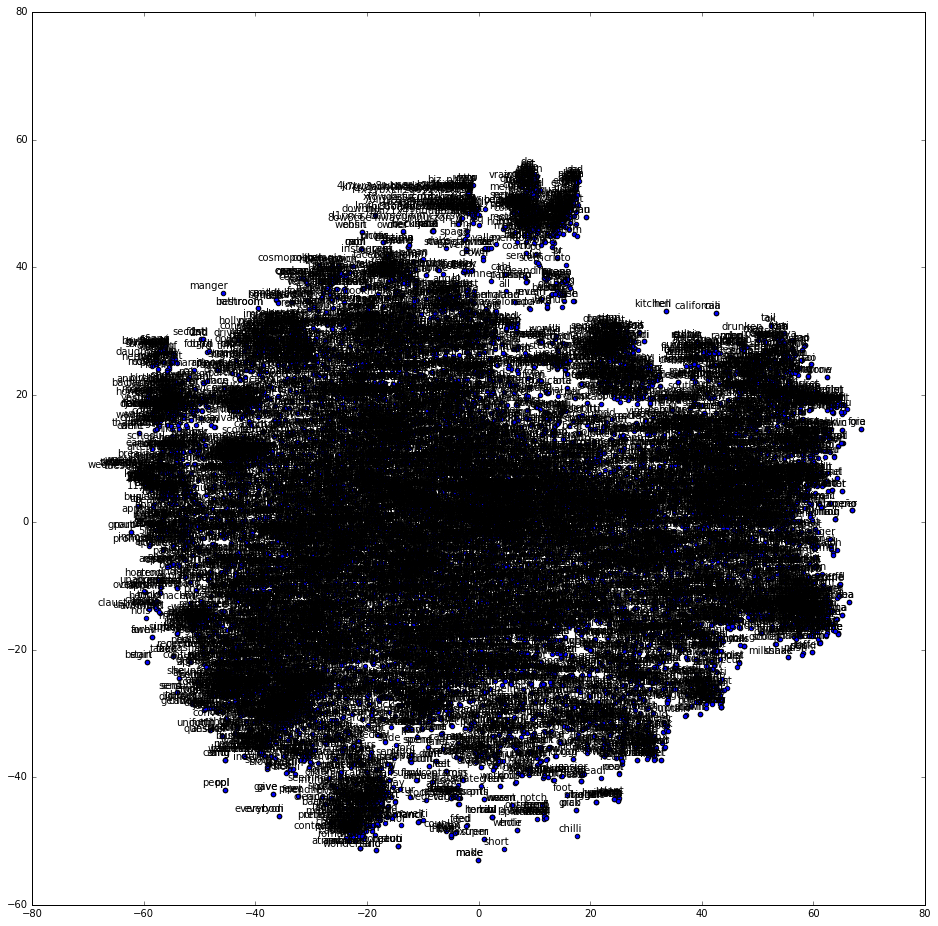

In [51]:
tsne_plot(model)

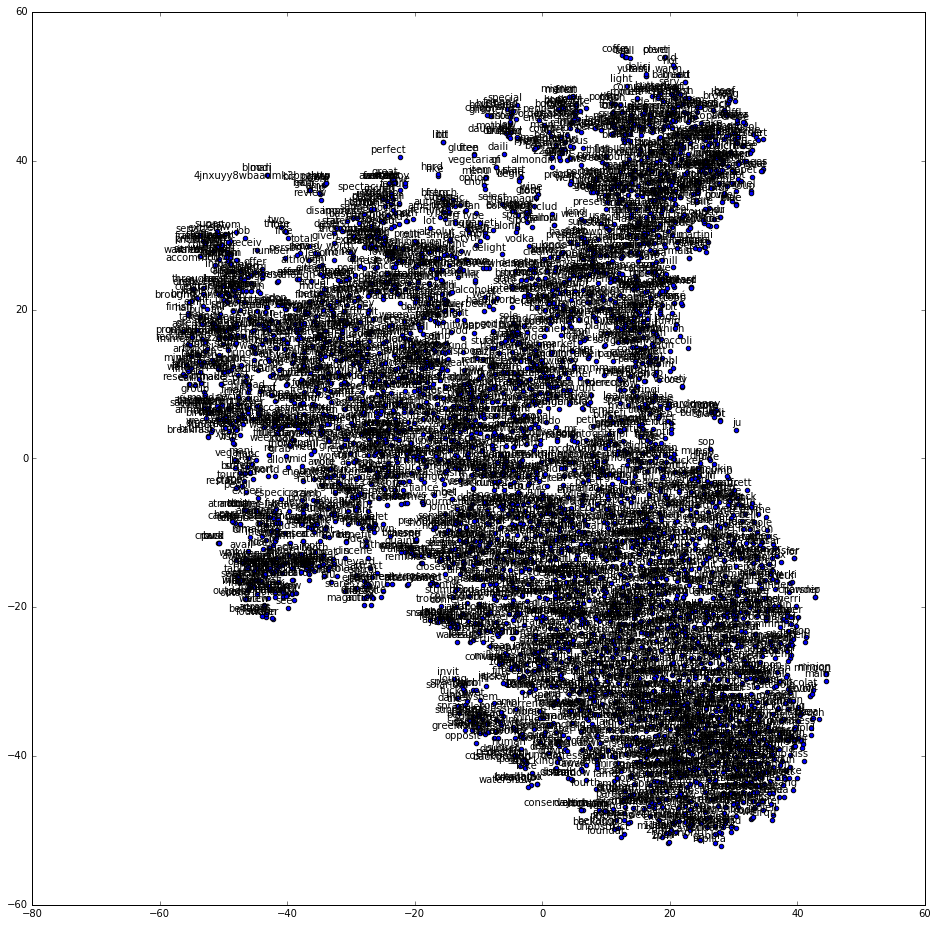

In [47]:
tsne_plot(model1)

In [48]:
type(model.wv.vocab)

dict

In [49]:
model.wv.vocab['food']

In [50]:
word_lst = [w for sublist in normalized for w in sublist]
word_lst[:5]

['enjoy', 'littl', 'peopl', 'watch', 'dine']

In [52]:
freq_word_lst = []
for i in range(0,1000):
    word = model.wv.index2word[i]
    freq_word_lst.append(word)

In [53]:
freq_word_lst

['food',
 'buffet',
 'good',
 'place',
 'like',
 'vega',
 'go',
 'time',
 'get',
 'wait',
 'one',
 'great',
 'tri',
 'order',
 'it',
 'realli',
 'would',
 'servic',
 'burger',
 'best',
 'dessert',
 'eat',
 'line',
 'fri',
 'come',
 'back',
 'also',
 'price',
 'sandwich',
 'got',
 'love',
 'even',
 'restaur',
 'tast',
 've',
 'chicken',
 'don',
 'much',
 'delici',
 'well',
 'worth',
 'want',
 'dinner',
 'definit',
 'crab',
 'came',
 'dish',
 'tabl',
 'didn',
 'pretti',
 'make',
 'better',
 'look',
 'thing',
 'amaz',
 'went',
 'everyth',
 'littl',
 'seat',
 'select',
 'nice',
 'think',
 'long',
 'peopl',
 'hot',
 'chocol',
 'first',
 'flavor',
 'you',
 'say',
 'qualiti',
 'chees',
 'star',
 'minut',
 'made',
 'lunch',
 'could',
 'hour',
 'meal',
 'fresh',
 'plate',
 'breakfast',
 're',
 'leg',
 'drink',
 'strip',
 'salad',
 'lot',
 'around',
 'meat',
 'wasn',
 'recommend',
 'experi',
 'serv',
 'friend',
 'ever',
 'expect',
 'still',
 'way',
 'enjoy',
 'day',
 'portion',
 'disappoint',
 '

In [54]:
my_vocab = {k:model.wv.vocab[k] for k in freq_word_lst if k in model.wv.vocab}

In [55]:
def tsne_plot_freq(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in my_vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=9)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

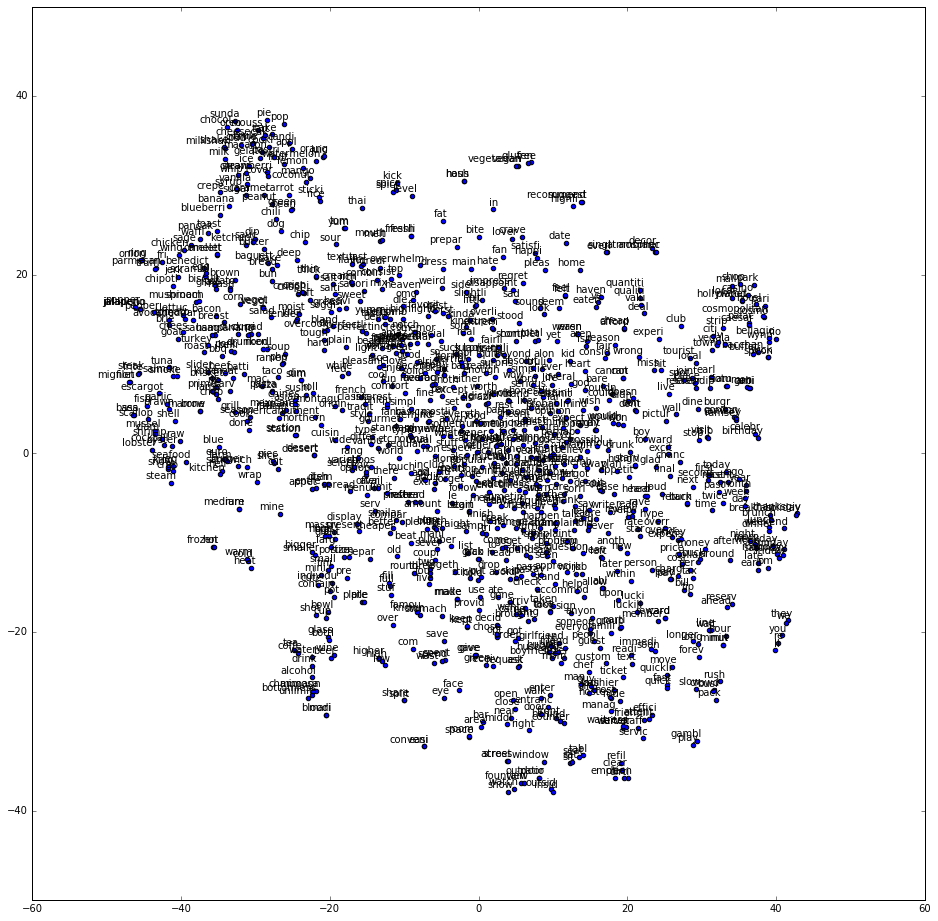

In [56]:
tsne_plot_freq(model)

Using the 500 most frequent words in the reviews, and map them to a 2-dimensional space, it is somewhat clear that the top-left part is about the **food**, the top-right part is about the **location**, and lower-center part is about **service/business**.

Also, you can observe some sentiment signals, such as 'top', 'well', 'love', 'perfect' and 'delicious' locate in the intersection(s) of the three parts.

In [67]:
most_freq_word = []
for i in range(0,500):
    word = model.wv.index2word[i]
    most_freq_word.append(word)

In [68]:
my_vocab = {k:model.wv.vocab[k] for k in most_freq_word if k in model.wv.vocab}

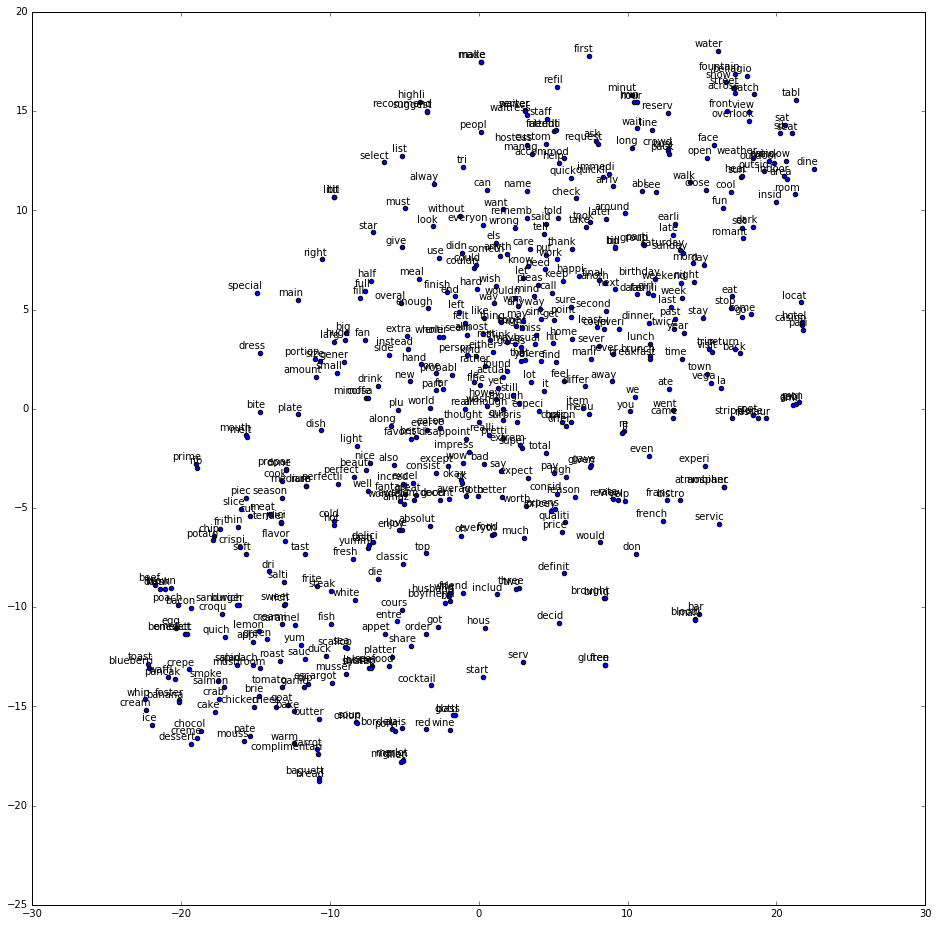

In [69]:
tsne_plot_freq(model)

So from above visualizations you can see that the terms are somewhat separated (so the latent topics could be cluster of words) - so based on the suggestion of five dimensions ('food', 'service', 'ambience', 'deals', and 'worhtiness'), I did some exploratory analysis. I think the results below can be used to identify (latent) topics. 

In [65]:
w = stemmer.stem('price')
model1.wv.most_similar(positive=w)

[('expens', 0.8132734894752502),
 ('qualiti', 0.7984447479248047),
 ('valu', 0.7965025901794434),
 ('overpr', 0.7639353275299072),
 ('afford', 0.75302654504776),
 ('pricey', 0.7240631580352783),
 ('cheap', 0.7172661423683167),
 ('consid', 0.7105605602264404),
 ('cost', 0.7074029445648193),
 ('rang', 0.6815131902694702)]

In [66]:
w = stemmer.stem('restaurant')
model1.wv.most_similar(positive=w)

[('place', 0.833743691444397),
 ('tourist', 0.8106674551963806),
 ('locat', 0.7805492877960205),
 ('steakhous', 0.7684863805770874),
 ('trap', 0.7620304822921753),
 ('pari', 0.7548383474349976),
 ('casino', 0.7537254095077515),
 ('chicago', 0.7408798336982727),
 ('eateri', 0.7408641576766968),
 ('citi', 0.7324322462081909)]

In [85]:
w1 = stemmer.stem('ambience')
w2 = stemmer.stem('location')
model1.wv.most_similar(positive=w1)#, negative=w2)

[('ambianc', 0.9674095511436462),
 ('atmospher', 0.9594449400901794),
 ('environ', 0.9471005797386169),
 ('vibe', 0.9143185615539551),
 ('decor', 0.8950786590576172),
 ('sceneri', 0.8794181942939758),
 ('charm', 0.871074378490448),
 ('classi', 0.8697537183761597),
 ('truli', 0.8448331356048584),
 ('central', 0.833415687084198)]

In [91]:
model1.wv.most_similar(positive=w2)

[('ambianc', 0.8307332992553711),
 ('strip', 0.8291972875595093),
 ('atmospher', 0.8131299614906311),
 ('ambienc', 0.8087866902351379),
 ('boulevard', 0.8005684614181519),
 ('central', 0.7937352657318115),
 ('blvd', 0.7936339378356934),
 ('tourist', 0.7862308025360107),
 ('restaur', 0.7805492877960205),
 ('spot', 0.77568119764328)]

In [92]:
w = stemmer.stem('business')
model1.wv.most_similar(positive=w)

[('pack', 0.9293253421783447),
 ('crowd', 0.9222991466522217),
 ('crazi', 0.8123741149902344),
 ('despit', 0.8062793612480164),
 ('loud', 0.8016042709350586),
 ('line', 0.769432783126831),
 ('there', 0.7691255807876587),
 ('due', 0.759738564491272),
 ('host', 0.7508124113082886),
 ('noon', 0.7497431635856628)]

In [93]:
w = stemmer.stem('wait')
model1.wv.most_similar(positive=w)

[('line', 0.8214706182479858),
 ('hour', 0.8024260401725769),
 ('min', 0.7997686266899109),
 ('longer', 0.7926262021064758),
 ('long', 0.7922327518463135),
 ('stand', 0.7884407043457031),
 ('problem', 0.7548599243164062),
 ('readi', 0.7531698346138),
 ('within', 0.7496975660324097),
 ('rush', 0.7401233315467834)]

In [94]:
w = stemmer.stem('value')
model1.wv.most_similar(positive=w)

[('expens', 0.9241329431533813),
 ('afford', 0.9238401651382446),
 ('overpr', 0.922265350818634),
 ('fair', 0.8968185782432556),
 ('qualiti', 0.8949495553970337),
 ('consid', 0.8608591556549072),
 ('compar', 0.8563376069068909),
 ('level', 0.8536601662635803),
 ('cheap', 0.8494590520858765),
 ('term', 0.8476232290267944)]

In [95]:
w = stemmer.stem('worth')
model1.wv.most_similar(positive=w)

[('pay', 0.7158501744270325),
 ('cannot', 0.7130535840988159),
 ('can', 0.708437442779541),
 ('cheap', 0.694197416305542),
 ('alon', 0.6872305870056152),
 ('especi', 0.679923415184021),
 ('hope', 0.6624035239219666),
 ('money', 0.6610572338104248),
 ('pricey', 0.6502284407615662),
 ('consid', 0.6429672837257385)]

In [97]:
w = stemmer.stem('service')
model1.wv.most_similar(positive=w)

[('staff', 0.7904011011123657),
 ('job', 0.7582511901855469),
 ('ambienc', 0.7518764138221741),
 ('environ', 0.7491909265518188),
 ('atmospher', 0.732141375541687),
 ('valu', 0.7067434787750244),
 ('waitstaff', 0.6999078989028931),
 ('ambianc', 0.6983109712600708),
 ('custom', 0.6927196383476257),
 ('prompt', 0.6765928268432617)]

In [102]:
#w = stemmer.stem('atmospher')
model1.wv.most_similar(positive='atmospher')

[('ambianc', 0.9836938977241516),
 ('ambienc', 0.959445059299469),
 ('vibe', 0.9015240669250488),
 ('decor', 0.8999812006950378),
 ('environ', 0.8882426023483276),
 ('classi', 0.8340445756912231),
 ('relax', 0.822429358959198),
 ('casual', 0.8155412673950195),
 ('locat', 0.8131300210952759),
 ('charm', 0.8125052452087402)]

In [106]:
model1.wv.most_similar(positive='staff', topn=40)

[('attent', 0.883885383605957),
 ('friendli', 0.8754956722259521),
 ('profession', 0.8371435403823853),
 ('waitstaff', 0.8365179896354675),
 ('effici', 0.828899621963501),
 ('prompt', 0.8284736275672913),
 ('bartend', 0.8226366639137268),
 ('server', 0.8171480298042297),
 ('fast', 0.8148822784423828),
 ('patient', 0.8112978935241699),
 ('polit', 0.7923811674118042),
 ('servic', 0.7904011011123657),
 ('help', 0.7900453209877014),
 ('attitud', 0.7835376858711243),
 ('rude', 0.7654735445976257),
 ('job', 0.7648391723632812),
 ('custom', 0.7635065317153931),
 ('waitress', 0.7619985938072205),
 ('courteou', 0.753203272819519),
 ('hostess', 0.7505384683609009),
 ('quick', 0.7504300475120544),
 ('smile', 0.7480350136756897),
 ('waiter', 0.7453262209892273),
 ('despit', 0.7288166880607605),
 ('knowledg', 0.7253719568252563),
 ('pleasant', 0.721368134021759),
 ('host', 0.7186971306800842),
 ('extrem', 0.7180296182632446),
 ('detail', 0.7168587446212769),
 ('scott', 0.7138160467147827),
 ('desk'

In [108]:
model1.wv.most_similar(positive='valu', topn=40)

[('expens', 0.9241329431533813),
 ('afford', 0.9238401651382446),
 ('overpr', 0.922265350818634),
 ('fair', 0.8968185782432556),
 ('qualiti', 0.8949495553970337),
 ('consid', 0.8608591556549072),
 ('compar', 0.8563376069068909),
 ('level', 0.8536601662635803),
 ('cheap', 0.8494590520858765),
 ('term', 0.8476232290267944),
 ('standard', 0.8462693095207214),
 ('higher', 0.8434086441993713),
 ('moder', 0.838331401348114),
 ('isn', 0.8340737819671631),
 ('rang', 0.8275974988937378),
 ('cost', 0.824525773525238),
 ('solid', 0.8215476870536804),
 ('mediocr', 0.8120601773262024),
 ('steep', 0.8027927875518799),
 ('memor', 0.8026753664016724),
 ('high', 0.7989445924758911),
 ('price', 0.7965025305747986),
 ('averag', 0.7933739423751831),
 ('justifi', 0.793303370475769),
 ('overal', 0.792961061000824),
 ('par', 0.7927165627479553),
 ('asid', 0.7924433946609497),
 ('deal', 0.7881677150726318),
 ('rel', 0.7848997712135315),
 ('lower', 0.7842766046524048),
 ('aren', 0.7836260795593262),
 ('outrag'

In [110]:
model1.wv.most_similar(positive='price', topn=40)

[('expens', 0.8132734894752502),
 ('qualiti', 0.7984447479248047),
 ('valu', 0.7965025901794434),
 ('overpr', 0.7639353275299072),
 ('afford', 0.75302654504776),
 ('pricey', 0.7240631580352783),
 ('cheap', 0.7172661423683167),
 ('consid', 0.7105605602264404),
 ('cost', 0.7074029445648193),
 ('rang', 0.6815131902694702),
 ('standard', 0.6812376379966736),
 ('compar', 0.677761435508728),
 ('high', 0.6671467423439026),
 ('level', 0.664540708065033),
 ('fair', 0.6634502410888672),
 ('isn', 0.6633458137512207),
 ('higher', 0.6599114537239075),
 ('money', 0.6514567136764526),
 ('term', 0.6436513662338257),
 ('averag', 0.6375682353973389),
 ('rel', 0.6332738399505615),
 ('deal', 0.6328272223472595),
 ('inexpens', 0.6308079957962036),
 ('shockingli', 0.6252551674842834),
 ('low', 0.6232759356498718),
 ('environ', 0.6211010217666626),
 ('rate', 0.6181138157844543),
 ('steakhous', 0.6162930727005005),
 ('mediocr', 0.6162303686141968),
 ('moder', 0.6132554411888123),
 ('solid', 0.6082821488380432

In [112]:
model1.wv.most_similar(positive=stemmer.stem('customer'), topn=40)

[('improv', 0.8788447976112366),
 ('poor', 0.8748594522476196),
 ('profession', 0.8583831787109375),
 ('impecc', 0.8457242250442505),
 ('job', 0.8440914750099182),
 ('prompt', 0.842320442199707),
 ('terribl', 0.8306328058242798),
 ('effici', 0.8197942972183228),
 ('courteou', 0.8190151453018188),
 ('friendli', 0.814610481262207),
 ('attent', 0.8113818764686584),
 ('detail', 0.8095049858093262),
 ('tag', 0.8062861561775208),
 ('snooti', 0.8032553195953369),
 ('waitstaff', 0.7998799085617065),
 ('slow', 0.7995535135269165),
 ('environ', 0.7966855764389038),
 ('pleasant', 0.796501636505127),
 ('horribl', 0.7942214012145996),
 ('train', 0.79193115234375),
 ('polit', 0.7896690964698792),
 ('compet', 0.7881300449371338),
 ('low', 0.7871875762939453),
 ('hospit', 0.7852172255516052),
 ('unaccept', 0.7806390523910522),
 ('level', 0.7796686291694641),
 ('match', 0.775195300579071),
 ('classi', 0.7681145071983337),
 ('except', 0.7668060064315796),
 ('knowledg', 0.7667611837387085),
 ('fact', 0.7

In [113]:
model1.wv.most_similar(positive=stemmer.stem('service'), topn=40)

[('staff', 0.7904011011123657),
 ('job', 0.7582511901855469),
 ('ambienc', 0.7518764138221741),
 ('environ', 0.7491909265518188),
 ('atmospher', 0.732141375541687),
 ('valu', 0.7067434787750244),
 ('waitstaff', 0.6999078989028931),
 ('ambianc', 0.6983109712600708),
 ('custom', 0.6927196383476257),
 ('prompt', 0.6765928268432617),
 ('profession', 0.6739245057106018),
 ('friendli', 0.6738024950027466),
 ('food', 0.6704187989234924),
 ('attent', 0.6647455096244812),
 ('beyond', 0.6593096256256104),
 ('impecc', 0.6557207107543945),
 ('effici', 0.6520535349845886),
 ('experi', 0.6506155729293823),
 ('deal', 0.64799964427948),
 ('match', 0.6421831846237183),
 ('pleasant', 0.6417486071586609),
 ('sceneri', 0.6410365104675293),
 ('so', 0.6374205350875854),
 ('notch', 0.6373942494392395),
 ('exemplari', 0.6356998682022095),
 ('improv', 0.6310486793518066),
 ('detail', 0.6286574006080627),
 ('qualiti', 0.6204113960266113),
 ('cleanli', 0.6174392700195312),
 ('level', 0.6151856184005737),
 ('fast